In [1]:
#coding:utf8
%matplotlib inline

原文地址：https://pandas.pydata.org/docs/user_guide/10min.html

这个一篇针对pandas新手的简短入门，想要了解更多复杂的内容，参阅[*Cookbook*](http://pandas.pydata.org/pandas-docs/stable/cookbook.html#cookbook)

通常，我们首先要导入以下几个库：

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 创建对象

通过传递一个list来创建**Series**，pandas会默认创建整型索引：

In [3]:
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

通过传递一个numpy array，日期索引以及列标签来创建一个**DataFrame**：

In [4]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [5]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,0.622837,-1.053551,1.299681,-0.173007
2013-01-02,1.443020,-0.273511,0.203349,0.291363
2013-01-03,-1.815994,-0.176148,-1.577580,0.041026
2013-01-04,-0.029505,-2.369616,-0.394426,0.365016
2013-01-05,0.251189,0.139544,-0.368742,1.440260
2013-01-06,0.054379,1.091786,0.064942,-0.836026


通过传递一个能够被转换为类似series的dict对象来创建一个**DataFrame**:

In [6]:
df2 = pd.DataFrame({ 'A' : 1.,
                     'B' : pd.Timestamp('20130102'),
                     'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                     'D' : np.array([3]*4,dtype='int32'),
                     'E' : pd.Categorical(["test","train","test","train"]),
                     'F' : 'foo' })
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


可以看到各列的数据类型为：

In [7]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

# 查看数据

查看frame中头部和尾部的几行：

In [8]:
df.head()

,A,B,C,D
2013-01-01,0.622837,-1.053551,1.299681,-0.173007
2013-01-02,1.443020,-0.273511,0.203349,0.291363
2013-01-03,-1.815994,-0.176148,-1.577580,0.041026
2013-01-04,-0.029505,-2.369616,-0.394426,0.365016
2013-01-05,0.251189,0.139544,-0.368742,1.440260


In [9]:
df.tail(3)

,A,B,C,D
2013-01-04,-0.029505,-2.369616,-0.394426,0.365016
2013-01-05,0.251189,0.139544,-0.368742,1.440260
2013-01-06,0.054379,1.091786,0.064942,-0.836026


显示索引、列名以及底层的numpy数据

In [10]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [11]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [12]:
df.values

array([[ 0.62283724, -1.05355055,  1.29968095, -0.17300688],
       [ 1.44301992, -0.27351066,  0.20334948,  0.29136326],
       [-1.81599428, -0.1761479 , -1.57758049,  0.04102625],
       [-0.02950478, -2.36961606, -0.39442593,  0.36501637],
       [ 0.25118878,  0.13954368, -0.3687416 ,  1.44025971],
       [ 0.05437909,  1.09178581,  0.06494244, -0.83602564]])

describe()能对数据做一个快速统计汇总

In [13]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.087654,-0.440249,-0.128796,0.188106
std,1.076001,1.172982,0.939735,0.749764
min,-1.815994,-2.369616,-1.577580,-0.836026
25%,-0.008534,-0.858541,-0.388005,-0.119499
50%,0.152784,-0.224829,-0.151900,0.166195
75%,0.529925,0.060621,0.168748,0.346603
max,1.443020,1.091786,1.299681,1.440260


对数据做转置：

In [14]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,0.622837,1.443020,-1.815994,-0.029505,0.251189,0.054379
B,-1.053551,-0.273511,-0.176148,-2.369616,0.139544,1.091786
C,1.299681,0.203349,-1.577580,-0.394426,-0.368742,0.064942
D,-0.173007,0.291363,0.041026,0.365016,1.440260,-0.836026


按轴进行排序：

In [15]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-0.173007,1.299681,-1.053551,0.622837
2013-01-02,0.291363,0.203349,-0.273511,1.443020
2013-01-03,0.041026,-1.577580,-0.176148,-1.815994
2013-01-04,0.365016,-0.394426,-2.369616,-0.029505
2013-01-05,1.440260,-0.368742,0.139544,0.251189
2013-01-06,-0.836026,0.064942,1.091786,0.054379


按值进行排序 :

In [16]:
df.sort_values(by='B')

,A,B,C,D
2013-01-04,-0.029505,-2.369616,-0.394426,0.365016
2013-01-01,0.622837,-1.053551,1.299681,-0.173007
2013-01-02,1.443020,-0.273511,0.203349,0.291363
2013-01-03,-1.815994,-0.176148,-1.577580,0.041026
2013-01-05,0.251189,0.139544,-0.368742,1.440260
2013-01-06,0.054379,1.091786,0.064942,-0.836026


# 数据选择

注意：虽然标准的Python/Numpy的表达式能完成选择与赋值等功能，但我们仍推荐使用优化过的pandas数据访问方法：.at，.iat，.loc，.iloc和.ix

## 选取

选择某一列数据，它会返回一个**Series**，等同于**df.A**：

In [17]:
df['A']

2013-01-01    0.622837
2013-01-02    1.443020
2013-01-03   -1.815994
2013-01-04   -0.029505
2013-01-05    0.251189
2013-01-06    0.054379
Freq: D, Name: A, dtype: float64

通过使用**[ ]**进行切片选取：

In [18]:
df[0:3]

,A,B,C,D
2013-01-01,0.622837,-1.053551,1.299681,-0.173007
2013-01-02,1.443020,-0.273511,0.203349,0.291363
2013-01-03,-1.815994,-0.176148,-1.577580,0.041026


In [19]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,1.443020,-0.273511,0.203349,0.291363
2013-01-03,-1.815994,-0.176148,-1.577580,0.041026
2013-01-04,-0.029505,-2.369616,-0.394426,0.365016


## 通过标签选取

通过标签进行交叉选取：

In [20]:
df.loc[dates[0]]

A    0.622837
B   -1.053551
C    1.299681
D   -0.173007
Name: 2013-01-01 00:00:00, dtype: float64

使用标签对多个轴进行选取

In [21]:
df.loc[:,['A','B']]

,A,B
2013-01-01,0.622837,-1.053551
2013-01-02,1.443020,-0.273511
2013-01-03,-1.815994,-0.176148
2013-01-04,-0.029505,-2.369616
2013-01-05,0.251189,0.139544
2013-01-06,0.054379,1.091786


进行标签切片，包含两个端点

In [22]:
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,1.443020,-0.273511
2013-01-03,-1.815994,-0.176148
2013-01-04,-0.029505,-2.369616


对于返回的对象进行降维处理

In [23]:
df.loc['20130102',['A','B']]

A    1.443020
B   -0.273511
Name: 2013-01-02 00:00:00, dtype: float64

获取一个标量

In [24]:
df.loc[dates[0],'A']

0.6228372385090254

快速获取标量（与上面的方法等价）

In [25]:
df.at[dates[0],'A']

0.6228372385090254

## 通过位置选取

通过传递整型的位置进行选取

In [26]:
df.iloc[3]

A   -0.029505
B   -2.369616
C   -0.394426
D    0.365016
Name: 2013-01-04 00:00:00, dtype: float64

通过整型的位置切片进行选取，与python/numpy形式相同

In [27]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,-0.029505,-2.369616
2013-01-05,0.251189,0.139544


只对行进行切片

In [28]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,1.443020,-0.273511,0.203349,0.291363
2013-01-03,-1.815994,-0.176148,-1.577580,0.041026


只对列进行切片

In [29]:
df.iloc[:,1:3]

,B,C
2013-01-01,-1.053551,1.299681
2013-01-02,-0.273511,0.203349
2013-01-03,-0.176148,-1.577580
2013-01-04,-2.369616,-0.394426
2013-01-05,0.139544,-0.368742
2013-01-06,1.091786,0.064942


只获取某个值

In [30]:
df.iloc[1,1]

-0.2735106583183681

快速获取某个值（与上面的方法等价）

In [31]:
df.iat[1,1]

-0.2735106583183681

## 布尔索引

用某列的值来选取数据

In [32]:
df[df.A > 0]

,A,B,C,D
2013-01-01,0.622837,-1.053551,1.299681,-0.173007
2013-01-02,1.443020,-0.273511,0.203349,0.291363
2013-01-05,0.251189,0.139544,-0.368742,1.440260
2013-01-06,0.054379,1.091786,0.064942,-0.836026


用**where**操作来选取数据

In [33]:
df[df > 0]

,A,B,C,D
2013-01-01,0.622837,NaN,1.299681,NaN
2013-01-02,1.443020,NaN,0.203349,0.291363
2013-01-03,NaN,NaN,NaN,0.041026
2013-01-04,NaN,NaN,NaN,0.365016
2013-01-05,0.251189,0.139544,NaN,1.440260
2013-01-06,0.054379,1.091786,0.064942,NaN


用**isin()**方法来过滤数据

In [34]:
df2 = df.copy()

In [35]:
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
df2

,A,B,C,D,E
2013-01-01,0.622837,-1.053551,1.299681,-0.173007,one
2013-01-02,1.443020,-0.273511,0.203349,0.291363,one
2013-01-03,-1.815994,-0.176148,-1.577580,0.041026,two
2013-01-04,-0.029505,-2.369616,-0.394426,0.365016,three
2013-01-05,0.251189,0.139544,-0.368742,1.440260,four
2013-01-06,0.054379,1.091786,0.064942,-0.836026,three


In [36]:
df2[df2['E'].isin(['two', 'four'])]

,A,B,C,D,E
2013-01-03,-1.815994,-0.176148,-1.577580,0.041026,two
2013-01-05,0.251189,0.139544,-0.368742,1.440260,four


## 赋值

赋值一个新的列，通过索引来自动对齐数据

In [37]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102',periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [38]:
df['F'] = s1
df

,A,B,C,D,F
2013-01-01,0.622837,-1.053551,1.299681,-0.173007,NaN
2013-01-02,1.443020,-0.273511,0.203349,0.291363,1.0
2013-01-03,-1.815994,-0.176148,-1.577580,0.041026,2.0
2013-01-04,-0.029505,-2.369616,-0.394426,0.365016,3.0
2013-01-05,0.251189,0.139544,-0.368742,1.440260,4.0
2013-01-06,0.054379,1.091786,0.064942,-0.836026,5.0


通过标签赋值

In [39]:
df.at[dates[0], 'A'] = 0
df

,A,B,C,D,F
2013-01-01,0.000000,-1.053551,1.299681,-0.173007,NaN
2013-01-02,1.443020,-0.273511,0.203349,0.291363,1.0
2013-01-03,-1.815994,-0.176148,-1.577580,0.041026,2.0
2013-01-04,-0.029505,-2.369616,-0.394426,0.365016,3.0
2013-01-05,0.251189,0.139544,-0.368742,1.440260,4.0
2013-01-06,0.054379,1.091786,0.064942,-0.836026,5.0


通过位置赋值

In [40]:
df.iat[0,1] = 0
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,1.299681,-0.173007,NaN
2013-01-02,1.443020,-0.273511,0.203349,0.291363,1.0
2013-01-03,-1.815994,-0.176148,-1.577580,0.041026,2.0
2013-01-04,-0.029505,-2.369616,-0.394426,0.365016,3.0
2013-01-05,0.251189,0.139544,-0.368742,1.440260,4.0
2013-01-06,0.054379,1.091786,0.064942,-0.836026,5.0


通过传递numpy array赋值

In [41]:
df.loc[:,'D'] = np.array([5] * len(df))
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,1.299681,5,NaN
2013-01-02,1.443020,-0.273511,0.203349,5,1.0
2013-01-03,-1.815994,-0.176148,-1.577580,5,2.0
2013-01-04,-0.029505,-2.369616,-0.394426,5,3.0
2013-01-05,0.251189,0.139544,-0.368742,5,4.0
2013-01-06,0.054379,1.091786,0.064942,5,5.0


通过**where**操作来赋值

In [42]:
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.299681,-5,NaN
2013-01-02,-1.443020,-0.273511,-0.203349,-5,-1.0
2013-01-03,-1.815994,-0.176148,-1.577580,-5,-2.0
2013-01-04,-0.029505,-2.369616,-0.394426,-5,-3.0
2013-01-05,-0.251189,-0.139544,-0.368742,-5,-4.0
2013-01-06,-0.054379,-1.091786,-0.064942,-5,-5.0


# 缺失值处理

在pandas中，用**np.nan**来代表缺失值，这些值默认不会参与运算。

reindex()允许你修改、增加、删除指定轴上的索引，并返回一个数据副本。

In [43]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns)+['E'])
df1.loc[dates[0]:dates[1],'E'] = 1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,1.299681,5,NaN,1.0
2013-01-02,1.443020,-0.273511,0.203349,5,1.0,1.0
2013-01-03,-1.815994,-0.176148,-1.577580,5,2.0,NaN
2013-01-04,-0.029505,-2.369616,-0.394426,5,3.0,NaN


剔除所有包含缺失值的行数据

In [44]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,1.44302,-0.273511,0.203349,5,1.0,1.0


填充缺失值

In [45]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,1.299681,5,5.0,1.0
2013-01-02,1.443020,-0.273511,0.203349,5,1.0,1.0
2013-01-03,-1.815994,-0.176148,-1.577580,5,2.0,5.0
2013-01-04,-0.029505,-2.369616,-0.394426,5,3.0,5.0


获取值是否为**nan**的布尔标记

In [46]:
pd.isnull(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


# 运算

## 统计

运算过程中，通常不包含缺失值。

进行描述性统计

In [47]:
df.mean()

A   -0.016152
B   -0.264658
C   -0.128796
D    5.000000
F    3.000000
dtype: float64

对其他轴进行同样的运算

In [48]:
df.mean(1)

2013-01-01    1.574920
2013-01-02    1.474572
2013-01-03    0.686055
2013-01-04    1.041291
2013-01-05    1.804398
2013-01-06    2.242221
Freq: D, dtype: float64

对于拥有不同维度的对象进行运算时需要对齐。除此之外，pandas会自动沿着指定维度计算。

In [49]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [50]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-2.815994,-1.176148,-2.577580,4.0,1.0
2013-01-04,-3.029505,-5.369616,-3.394426,2.0,0.0
2013-01-05,-4.748811,-4.860456,-5.368742,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


## Apply 函数作用

通过apply()对函数作用

In [51]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,1.299681,5,NaN
2013-01-02,1.443020,-0.273511,1.503030,10,1.0
2013-01-03,-0.372974,-0.449659,-0.074550,15,3.0
2013-01-04,-0.402479,-2.819275,-0.468976,20,6.0
2013-01-05,-0.151290,-2.679731,-0.837718,25,10.0
2013-01-06,-0.096911,-1.587945,-0.772775,30,15.0


In [52]:
df.apply(lambda x:x.max()-x.min())

A    3.259014
B    3.461402
C    2.877261
D    0.000000
F    4.000000
dtype: float64

## 频数统计

In [53]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    2
1    1
2    4
3    0
4    2
5    2
6    3
7    1
8    2
9    4
dtype: int32

In [54]:
s.value_counts()

2    4
4    2
1    2
3    1
0    1
dtype: int64

## 字符串方法

对于Series对象，在其str属性中有着一系列的字符串处理方法。就如同下段代码一样，能很方便的对array中各个元素进行运算。值得注意的是，在str属性中的模式匹配默认使用正则表达式。

In [55]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

# 合并

## Concat 连接

pandas中提供了大量的方法能够轻松对Series，DataFrame和Panel对象进行不同满足逻辑关系的合并操作

通过**concat()**来连接pandas对象

In [56]:
df = pd.DataFrame(np.random.randn(10,4))
df

,0,1,2,3
0,-1.064607,-0.844086,-1.054121,-0.286138
1,0.762100,-1.949483,1.901266,0.042480
2,0.499028,-0.330671,-1.470282,-1.920693
3,0.168920,-0.057558,-0.014618,-0.009611
4,-0.829151,0.614139,0.348185,-0.153280
5,-0.621518,1.690917,1.149722,-0.283261
6,1.199081,-1.383661,-1.891337,0.203896
7,-2.028361,0.021639,-0.438720,0.998556
8,-0.959159,-0.128978,-1.756995,-0.341417
9,0.318002,-0.837123,0.380438,-0.932318


In [57]:
#break it into pieces
pieces = [df[:3], df[3:7], df[7:]]
pieces

[          0         1         2         3
 0 -1.064607 -0.844086 -1.054121 -0.286138
 1  0.762100 -1.949483  1.901266  0.042480
 2  0.499028 -0.330671 -1.470282 -1.920693,
           0         1         2         3
 3  0.168920 -0.057558 -0.014618 -0.009611
 4 -0.829151  0.614139  0.348185 -0.153280
 5 -0.621518  1.690917  1.149722 -0.283261
 6  1.199081 -1.383661 -1.891337  0.203896,
           0         1         2         3
 7 -2.028361  0.021639 -0.438720  0.998556
 8 -0.959159 -0.128978 -1.756995 -0.341417
 9  0.318002 -0.837123  0.380438 -0.932318]

In [58]:
pd.concat(pieces)

,0,1,2,3
0,-1.064607,-0.844086,-1.054121,-0.286138
1,0.762100,-1.949483,1.901266,0.042480
2,0.499028,-0.330671,-1.470282,-1.920693
3,0.168920,-0.057558,-0.014618,-0.009611
4,-0.829151,0.614139,0.348185,-0.153280
5,-0.621518,1.690917,1.149722,-0.283261
6,1.199081,-1.383661,-1.891337,0.203896
7,-2.028361,0.021639,-0.438720,0.998556
8,-0.959159,-0.128978,-1.756995,-0.341417
9,0.318002,-0.837123,0.380438,-0.932318


## Join 合并

类似于SQL中的合并(merge)

In [59]:
left = pd.DataFrame({'key':['foo', 'foo'], 'lval':[1,2]})
left

,key,lval
0,foo,1
1,foo,2


In [60]:
right = pd.DataFrame({'key':['foo', 'foo'], 'lval':[4,5]})
right

,key,lval
0,foo,4
1,foo,5


In [61]:
pd.merge(left, right, on='key')

,key,lval_x,lval_y
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


## Append 添加

将若干行添加到dataFrame后面

In [62]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,-2.079694,-1.067964,-1.256181,-0.157860
1,-0.966373,0.501331,0.286737,-0.763971
2,0.458101,-1.314781,0.022112,-0.344507
3,0.941045,0.490869,1.524365,1.634391
4,-0.096861,-0.516835,0.904744,0.494285
5,-2.579131,1.067796,1.025133,2.583726
6,1.602357,1.332744,-1.403105,0.331875
7,-0.607169,0.112514,0.255247,-1.084042


In [63]:
s = df.iloc[3]
s

A    0.941045
B    0.490869
C    1.524365
D    1.634391
Name: 3, dtype: float64

In [64]:
df.append(s, ignore_index=True)

,A,B,C,D
0,-2.079694,-1.067964,-1.256181,-0.157860
1,-0.966373,0.501331,0.286737,-0.763971
2,0.458101,-1.314781,0.022112,-0.344507
3,0.941045,0.490869,1.524365,1.634391
4,-0.096861,-0.516835,0.904744,0.494285
5,-2.579131,1.067796,1.025133,2.583726
6,1.602357,1.332744,-1.403105,0.331875
7,-0.607169,0.112514,0.255247,-1.084042
8,0.941045,0.490869,1.524365,1.634391


# 分组

对于“group by”操作，我们通常是指以下一个或几个步骤：
* **划分** 按照某些标准将数据分为不同的组
* **应用** 对每组数据分别执行一个函数
* **组合** 将结果组合到一个数据结构

In [65]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar', 
                          'foo', 'bar', 'foo', 'bar'],
                   'B' : ['one', 'one', 'two', 'three', 
                          'two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)})
df

,A,B,C,D
0,foo,one,0.816855,-1.836912
1,bar,one,0.971727,-0.806691
2,foo,two,0.501725,-2.056642
3,bar,three,-0.881417,-0.961592
4,foo,two,-0.484541,-0.583630
5,bar,two,0.171853,0.360249
6,foo,one,-0.842943,-1.000058
7,bar,three,0.816748,0.914783


分组并对每个分组应用sum函数

In [66]:
df.groupby('A').sum()

,C,D
A,,
bar,1.078911,-0.493251
foo,-0.008904,-5.477241


按多个列分组形成层级索引，然后应用函数

In [67]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one    0.971727 -0.806691
    three -0.064669 -0.046809
    two    0.171853  0.360249
foo one   -0.026088 -2.836969
    two    0.017185 -2.640271

# 变形

## 堆叠

In [68]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']]))

In [69]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])

In [70]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])

In [71]:
df2 = df[:4]
df2

A         B
first second                    
bar   one     1.355334 -0.999226
      two    -0.000946  1.109135
baz   one     1.809017 -0.398362
      two    -0.022749 -0.893286

**stack()**方法对DataFrame的列“压缩”一个层级

In [72]:
stacked = df2.stack()
stacked

first  second   
bar    one     A    1.355334
               B   -0.999226
       two     A   -0.000946
               B    1.109135
baz    one     A    1.809017
               B   -0.398362
       two     A   -0.022749
               B   -0.893286
dtype: float64

对于一个“堆叠过的”DataFrame或者Series（拥有MultiIndex作为索引），**stack()**的逆操作是**unstack()**，默认反堆叠到上一个层级

In [73]:
stacked.unstack()

A         B
first second                    
bar   one     1.355334 -0.999226
      two    -0.000946  1.109135
baz   one     1.809017 -0.398362
      two    -0.022749 -0.893286

In [74]:
stacked.unstack(1)

second        one       two
first                      
bar   A  1.355334 -0.000946
      B -0.999226  1.109135
baz   A  1.809017 -0.022749
      B -0.398362 -0.893286

In [75]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  1.355334  1.809017
       B -0.999226 -0.398362
two    A -0.000946 -0.022749
       B  1.109135 -0.893286

## 数据透视表

In [76]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                   'B' : ['A', 'B', 'C'] * 4,
                   'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D' : np.random.randn(12),
                   'E' : np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,1.754641,2.154444
1,one,B,foo,-1.050924,-1.207315
2,two,C,foo,0.810443,0.626693
3,three,A,bar,-1.376630,-2.959142
4,one,B,bar,2.054897,-0.254765
5,one,C,bar,0.131163,0.374610
6,two,A,foo,-0.628845,0.012789
7,three,B,foo,0.218077,-0.982755
8,one,C,foo,0.596498,0.936399
9,one,A,bar,0.068485,-1.025118


 我们可以轻松地从这个数据得到透视表

In [77]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A  0.068485  1.754641
      B  2.054897 -1.050924
      C  0.131163  0.596498
three A -1.376630       NaN
      B       NaN  0.218077
      C -0.371916       NaN
two   A       NaN -0.628845
      B -1.971795       NaN
      C       NaN  0.810443

# 时间序列

pandas在对频率转换进行重新采样时拥有着简单，强大而且高效的功能（例如把按秒采样的数据转换为按5分钟采样的数据）。这在金融领域很常见，但又不限于此。

In [78]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
rng

DatetimeIndex(['2012-01-01 00:00:00', '2012-01-01 00:00:01',
               '2012-01-01 00:00:02', '2012-01-01 00:00:03',
               '2012-01-01 00:00:04', '2012-01-01 00:00:05',
               '2012-01-01 00:00:06', '2012-01-01 00:00:07',
               '2012-01-01 00:00:08', '2012-01-01 00:00:09',
               '2012-01-01 00:00:10', '2012-01-01 00:00:11',
               '2012-01-01 00:00:12', '2012-01-01 00:00:13',
               '2012-01-01 00:00:14', '2012-01-01 00:00:15',
               '2012-01-01 00:00:16', '2012-01-01 00:00:17',
               '2012-01-01 00:00:18', '2012-01-01 00:00:19',
               '2012-01-01 00:00:20', '2012-01-01 00:00:21',
               '2012-01-01 00:00:22', '2012-01-01 00:00:23',
               '2012-01-01 00:00:24', '2012-01-01 00:00:25',
               '2012-01-01 00:00:26', '2012-01-01 00:00:27',
               '2012-01-01 00:00:28', '2012-01-01 00:00:29',
               '2012-01-01 00:00:30', '2012-01-01 00:00:31',
               '2012-01-

In [79]:
ts = pd.Series(np.random.randint(0,500,len(rng)), index=rng)
ts

2012-01-01 00:00:00    370
2012-01-01 00:00:01    235
2012-01-01 00:00:02    211
2012-01-01 00:00:03    276
2012-01-01 00:00:04    179
                      ... 
2012-01-01 00:01:35    251
2012-01-01 00:01:36    100
2012-01-01 00:01:37    460
2012-01-01 00:01:38    335
2012-01-01 00:01:39    480
Freq: S, Length: 100, dtype: int32

In [80]:
ts.resample('5Min', how='sum')

D:\env\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  """Entry point for launching an IPython kernel.


2012-01-01    25317
Freq: 5T, dtype: int32

时区表示

In [81]:
rng = pd.date_range('3/6/2012', periods=5, freq='D')
rng

DatetimeIndex(['2012-03-06', '2012-03-07', '2012-03-08', '2012-03-09',
               '2012-03-10'],
              dtype='datetime64[ns]', freq='D')

In [82]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-06    0.972096
2012-03-07    0.889042
2012-03-08   -1.050244
2012-03-09    0.942296
2012-03-10   -0.640941
Freq: D, dtype: float64

In [83]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-06 00:00:00+00:00    0.972096
2012-03-07 00:00:00+00:00    0.889042
2012-03-08 00:00:00+00:00   -1.050244
2012-03-09 00:00:00+00:00    0.942296
2012-03-10 00:00:00+00:00   -0.640941
Freq: D, dtype: float64

时区转换

In [84]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00    0.972096
2012-03-06 19:00:00-05:00    0.889042
2012-03-07 19:00:00-05:00   -1.050244
2012-03-08 19:00:00-05:00    0.942296
2012-03-09 19:00:00-05:00   -0.640941
Freq: D, dtype: float64

时间跨度转换

In [85]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')
rng

DatetimeIndex(['2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30',
               '2012-05-31'],
              dtype='datetime64[ns]', freq='M')

In [86]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31    0.200722
2012-02-29   -0.169753
2012-03-31    0.083887
2012-04-30   -0.866545
2012-05-31   -0.947765
Freq: M, dtype: float64

In [87]:
ps = ts.to_period()
ps

2012-01    0.200722
2012-02   -0.169753
2012-03    0.083887
2012-04   -0.866545
2012-05   -0.947765
Freq: M, dtype: float64

In [88]:
ps.to_timestamp()

2012-01-01    0.200722
2012-02-01   -0.169753
2012-03-01    0.083887
2012-04-01   -0.866545
2012-05-01   -0.947765
Freq: MS, dtype: float64

日期与时间戳之间的转换使得可以使用一些方便的算术函数。例如，我们把以11月为年底的季度数据转换为当前季度末月底为始的数据

In [89]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')
prng

PeriodIndex(['1990Q1', '1990Q2', '1990Q3', '1990Q4', '1991Q1', '1991Q2',
             '1991Q3', '1991Q4', '1992Q1', '1992Q2', '1992Q3', '1992Q4',
             '1993Q1', '1993Q2', '1993Q3', '1993Q4', '1994Q1', '1994Q2',
             '1994Q3', '1994Q4', '1995Q1', '1995Q2', '1995Q3', '1995Q4',
             '1996Q1', '1996Q2', '1996Q3', '1996Q4', '1997Q1', '1997Q2',
             '1997Q3', '1997Q4', '1998Q1', '1998Q2', '1998Q3', '1998Q4',
             '1999Q1', '1999Q2', '1999Q3', '1999Q4', '2000Q1', '2000Q2',
             '2000Q3', '2000Q4'],
            dtype='period[Q-NOV]', freq='Q-NOV')

In [90]:
ts = pd.Series(np.random.randn(len(prng)), index = prng)
ts

1990Q1   -0.095355
1990Q2   -0.849724
1990Q3    0.424838
1990Q4    0.357498
1991Q1    0.495939
1991Q2   -1.209924
1991Q3    0.165530
1991Q4   -0.476355
1992Q1    0.507571
1992Q2   -1.647150
1992Q3    0.251139
1992Q4    0.245742
1993Q1    0.004994
1993Q2    0.352525
1993Q3   -0.820543
1993Q4    0.746995
1994Q1    0.225161
1994Q2   -0.346585
1994Q3    2.212793
1994Q4   -0.273160
1995Q1   -0.750748
1995Q2    0.968009
1995Q3    0.495173
1995Q4   -1.076945
1996Q1    0.889522
1996Q2    0.751367
1996Q3   -0.285633
1996Q4   -0.743498
1997Q1    0.215439
1997Q2    2.114645
1997Q3    0.218191
1997Q4    0.322908
1998Q1    2.068009
1998Q2   -0.024278
1998Q3    0.936550
1998Q4   -0.434884
1999Q1    0.599492
1999Q2   -0.802915
1999Q3   -0.503518
1999Q4   -0.877589
2000Q1    1.025684
2000Q2    0.659845
2000Q3    0.047494
2000Q4   -0.000982
Freq: Q-NOV, dtype: float64

In [91]:
ts.index = (prng.asfreq('M', 'end') ) .asfreq('H', 'start') +9
ts

1990-02-01 09:00   -0.095355
1990-05-01 09:00   -0.849724
1990-08-01 09:00    0.424838
1990-11-01 09:00    0.357498
1991-02-01 09:00    0.495939
1991-05-01 09:00   -1.209924
1991-08-01 09:00    0.165530
1991-11-01 09:00   -0.476355
1992-02-01 09:00    0.507571
1992-05-01 09:00   -1.647150
1992-08-01 09:00    0.251139
1992-11-01 09:00    0.245742
1993-02-01 09:00    0.004994
1993-05-01 09:00    0.352525
1993-08-01 09:00   -0.820543
1993-11-01 09:00    0.746995
1994-02-01 09:00    0.225161
1994-05-01 09:00   -0.346585
1994-08-01 09:00    2.212793
1994-11-01 09:00   -0.273160
1995-02-01 09:00   -0.750748
1995-05-01 09:00    0.968009
1995-08-01 09:00    0.495173
1995-11-01 09:00   -1.076945
1996-02-01 09:00    0.889522
1996-05-01 09:00    0.751367
1996-08-01 09:00   -0.285633
1996-11-01 09:00   -0.743498
1997-02-01 09:00    0.215439
1997-05-01 09:00    2.114645
1997-08-01 09:00    0.218191
1997-11-01 09:00    0.322908
1998-02-01 09:00    2.068009
1998-05-01 09:00   -0.024278
1998-08-01 09:

# 分类

从版本0.15开始，pandas在**DataFrame**中开始包括分类数据。

In [92]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'e', 'e']})
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,e
5,6,e


把raw_grade转换为分类类型

In [93]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    e
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

重命名类别名为更有意义的名称

In [94]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

对分类重新排序，并添加缺失的分类

In [95]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])
df["grade"]

0    very good
1         good
2         good
3    very good
4     very bad
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

排序是按照分类的顺序进行的，而不是字典序

In [96]:
df.sort_values(by="grade")

,id,raw_grade,grade
4,5,e,very bad
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good


按分类分组时，也会显示空的分类

In [97]:
df.groupby("grade").size()

grade
very bad     2
bad          0
medium       0
good         2
very good    2
dtype: int64

# 绘图

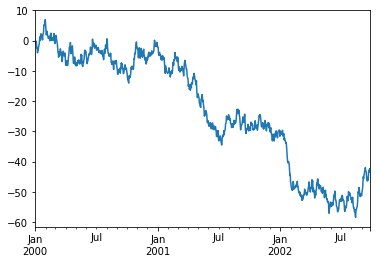

In [98]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

对于DataFrame类型，**plot()**能很方便地画出所有列及其标签

<Figure size 432x288 with 0 Axes>

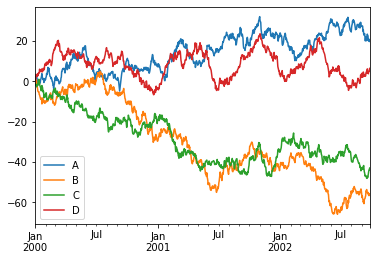

In [99]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure(); df.plot(); plt.legend(loc='best')

# 获取数据的I/O

## CSV

写入一个csv文件

In [100]:
df.to_csv('foo.csv')

从一个csv文件读入

In [101]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.967211,-1.691382,-1.150918,0.061341
1,2000-01-02,2.088838,-1.150570,-1.808061,0.478891
2,2000-01-03,2.353612,-1.249628,-1.715761,2.103818
3,2000-01-04,1.819069,0.650077,-1.779250,3.445253
4,2000-01-05,1.865620,0.192320,-2.716169,3.072974
...,...,...,...,...,...
995,2002-09-22,21.065380,-55.947744,-44.790828,4.857333
996,2002-09-23,20.135277,-56.681067,-43.955752,4.838393
997,2002-09-24,19.695739,-55.678816,-43.889171,5.196180
998,2002-09-25,20.433371,-56.136205,-42.902910,6.510156


## HDF5

HDFStores的读写

写入一个HDF5 Store

In [102]:
df.to_hdf('foo.h5', 'df')

从一个HDF5 Store读入

In [103]:
pd.read_hdf('foo.h5', 'df')

,A,B,C,D
2000-01-01,0.967211,-1.691382,-1.150918,0.061341
2000-01-02,2.088838,-1.150570,-1.808061,0.478891
2000-01-03,2.353612,-1.249628,-1.715761,2.103818
2000-01-04,1.819069,0.650077,-1.779250,3.445253
2000-01-05,1.865620,0.192320,-2.716169,3.072974
...,...,...,...,...
2002-09-22,21.065380,-55.947744,-44.790828,4.857333
2002-09-23,20.135277,-56.681067,-43.955752,4.838393
2002-09-24,19.695739,-55.678816,-43.889171,5.196180
2002-09-25,20.433371,-56.136205,-42.902910,6.510156


## Excel

MS Excel的读写

写入一个Excel文件

In [104]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

从一个excel文件读入

In [105]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.967211,-1.691382,-1.150918,0.061341
1,2000-01-02,2.088838,-1.150570,-1.808061,0.478891
2,2000-01-03,2.353612,-1.249628,-1.715761,2.103818
3,2000-01-04,1.819069,0.650077,-1.779250,3.445253
4,2000-01-05,1.865620,0.192320,-2.716169,3.072974
...,...,...,...,...,...
995,2002-09-22,21.065380,-55.947744,-44.790828,4.857333
996,2002-09-23,20.135277,-56.681067,-43.955752,4.838393
997,2002-09-24,19.695739,-55.678816,-43.889171,5.196180
998,2002-09-25,20.433371,-56.136205,-42.902910,6.510156
